# Importation:

In [44]:
import pandas as pd
import numpy as np
import re
from unicodedata import normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cleaning:

In [45]:
df = pd.read_csv('indeed.pre_processing.csv')
def salary_man(df):
    salaire_moyen = []
    for i in range(len(df)):
        try:
            salaire_liste = re.findall('(\d+),?',normalize('NFKD',df['salaire'][i]).replace(' ',''))
            mois = re.search('mois',df['salaire'][i])
            jour = re.search('jour',df['salaire'][i])
            heure = re.search('heure',df['salaire'][i])
            if mois:
                if len(salaire_liste) > 1:
                    moy = 12 * (int(salaire_liste[0]) + int(salaire_liste[1])) / 2
                    salaire_moyen.append(moy)
                else:
                    salaire_moyen.append(int(salaire_liste[0]) * 12)
            elif jour:
                # Le nombre de jours travaillés maximum retenu sur la période de référence est de 261 jours.
                if len(salaire_liste) > 1:
                    moy = 261 * (int(salaire_liste[0]) + int(salaire_liste[1])) / 2
                    salaire_moyen.append(moy)
                else:
                    salaire_moyen.append(int(salaire_liste[0]) * 261)
            elif heure:
                # 1600 heures travaillées par an.
                if len(salaire_liste) > 1:
                    moy = (int(salaire_liste[0]) + int(salaire_liste[1])) / 2
                    if moy < 20:
                    #grande chance que le salaire soit exprimé en fait en k euros:
                        salaire_moyen.append(moy * 1600)
                    else:
                        salaire_moyen.append(moy * 1000)
                else:
                    if int(salaire_liste[0]) < 20:
                        salaire_moyen.append(int(salaire_liste[0]) * 1600)
                    else:
                        salaire_moyen.append(int(salaire_liste[0]) * 1000)
            else:
                if len(salaire_liste) > 1:
                    moy = (int(salaire_liste[0]) + int(salaire_liste[1])) / 2
                    salaire_moyen.append(moy)
                else:
                    salaire_moyen.append(int(salaire_liste[0]))
                    
        except:
            salaire_moyen.append('None')
            continue
    return salaire_moyen

salaire_moyen = salary_man(df)

#df.insert(6, "salaire_moyen", salaire_moyen, True)
df['salaire_moyen'] = salaire_moyen

contrat = ['cdi', 'cdd', 'stage', 'alternance', 'freelance']
data = []
for i in range(len(df)):
    inside_data = []
    for ele in contrat:
        pattern = re.compile(r"[\s/\(\),.]"+ele+r"[\s/\(\),.]")
        value = pattern.search(df['description'][i].lower().replace('\n',' ').replace('\r',' '))
        if value:
            inside_data.append(1)
        else:
            inside_data.append(0)
    data.append(inside_data)

desc = titre = [ele+'_desc' for ele in contrat]
contrat_desc = pd.DataFrame(data, columns=desc)

contrat = ['cdi', 'cdd', 'stage', 'alternance', 'freelance']
data = []
for i in range(len(df)):
    inside_data = []
    for ele in contrat:
        pattern = re.compile(r"[\s/\(\),.]"+ele+r"[\s/\(\),.]?")
        value = pattern.search(df['titre'][i].lower().replace('\n',' ').replace('\r',' '))
        if value:
            inside_data.append(1)
        else:
            inside_data.append(0)
    data.append(inside_data)
titre = [ele+'_titre' for ele in contrat]
contrat_titre = pd.DataFrame(data, columns=titre)

liste_langage = ['python', 'r','vba', 'mysql','excel','asp.net','nosql','sql','linux','mongodb',
            'mariadb','java','javascript','php','html','css','sas','c#','ruby','swift','objective-c',
            'vb.net','kotlin','scala','bash','powershell','shell','front end','back end','soap',
            'dasl', 'pict', 'rexx', 'd', 'asp.net', 'f#', 'joy', 'sr', 'back end', 'poplog', 
            'modula-2', 'powershell', 'bash', 'concurrent pascal', 'apl', 'eiffel', 'lisp', 
            'cilk', 'c', 'awk', 'charity', 'bliss', 'spin', 'swift', 'visual basic', 'game maker language',
            'lisaac', 'xl', 'nosql', 'limbo', 'e', 'lava', 'slate', 'revolution', 'coldfusion', 
            'matlab', 'vb.net', 'cobol', 'tcl', 'rpg', 'sas', 'curl', 'front end', 'nemerle', 'f-script', 
            'xml', 's-lang', 'curry', 'basic', 'autoit', 'prolog', 'erlang', 'maya embedded language', 
            'frink', 'oz', 'windows powershell', 'beta', 'moo', 'object-z', 'self', 'leda', 'fortran', 
            'smalltalk', 'afnix', 'mysql', 'm', 'turing', 'jovial', 'lua', 'mondrian', 'io', 'salsa', 
            'kotlin', 'css', 'xotcl', 'perl', 'component pascal', 'mongodb', 'xhtml', 'dibol', 'oberon',
            'ada', 'visual foxpro', 'clist', 'pl/c', 'algol', 'mariadb', 'sql', 'pliant', 'excel', 
            'cobra', 'occam', 'obliq', 'prograph', 'chuck', 'pl/i', 'hypertalk', 'forth', 'ici', 
            'vba', 'beanshell', 'sgml', 'soap', 'opal', 'small', 'pascal', 'applescript', 'roop', 
            'agora', 'moto', 'rapira', 'alf', 'r', 'ml', 'javascript', 'pcastl', 'abcl', 'postscript', 
            'oxygene', 'cecil', 'clean', 'ops5', 'c\\+\\+', 'shell', 'haskell', 'kite', 'cleo', 'q', 'linux', 
                'vbscript', 'joule', 'rebol', 'jass', 'j', 'fril']

liste_outils = ['tableau', 'powerbi','symfony', 'jquery','angular','react','react native','node js','git','github',
            'visual studio','django','flask','api rest','laravel', 'hololens', 'docker', 'jira', 'scrum', 'kanban', 
               'azure','aws', 'teamcity', 'jenkins']

lieu = pd.get_dummies(df['localisation']).drop(['Bordeaux'], axis = 1)
langage = df[list(set(liste_langage))]
outils = df[liste_outils]

X_Y = pd.concat([lieu, langage, outils, contrat_titre, contrat_desc,df['salaire_moyen']],axis = 1)
Y = X_Y['salaire_moyen'][X_Y['salaire_moyen'] != 'None']
X = X_Y[X_Y['salaire_moyen'] != 'None'].drop(['salaire_moyen'], axis = 1)
X_train, X_test, y_trainy, y_testy = train_test_split(X,Y , test_size=0.25, random_state=0)
kmeans = KMeans(n_clusters=4,init = 'k-means++', max_iter=1000).fit(y_trainy.values.reshape(-1, 1))
y_train = kmeans.labels_
y_test = kmeans.predict(y_testy.values.reshape(-1, 1))

## Graphes:

In [107]:
def graph_result(fichier, n = 1500, variance = 0.05):
    result = pd.read_csv(fichier)
    result_variance = result[(result['mean_train_score'] - result['mean_test_score']) < variance]
    
    plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
    
    plt.subplot(121)
    plt.scatter(result['rank_test_score'][result['rank_test_score'] < n],
                result['mean_test_score'][result['rank_test_score'] < n],color='red',
                marker = "+", label="Test Score")
    plt.scatter(result['rank_test_score'][result['rank_test_score'] < n],
                result['mean_train_score'][result['rank_test_score'] < n],color='blue',
                marker = "x", label="Test Score")
    
    plt.title("Test Score et Train Score \nen fonction du classement au Test Score",
              fontsize = 14, loc = 'center')
    plt.xlabel("Classement au Test Score",fontsize = 12)
    plt.ylabel("Score",fontsize = 12)
    plt.legend(loc = 3)
    
    plt.subplot(122)
    plt.scatter(result_variance['rank_test_score'][result_variance['rank_test_score'] < n],
                result_variance['mean_test_score'][result_variance['rank_test_score'] < n],color='red',
                marker = "+", label="Test Score")
    plt.scatter(result_variance['rank_test_score'][result_variance['rank_test_score'] < n],
                result_variance['mean_train_score'][result_variance['rank_test_score'] < n],color='blue',
                marker = "x", label="Train Score")
    
    plt.title("Test Score et Train Score \nen fonction du classement au Test Score",
              fontsize = 14, loc = 'center')
    plt.xlabel("Classement au Test Score",fontsize = 12)
    plt.ylabel("Score",fontsize = 12)
    plt.legend(loc = 3)
    plt.show()

# AdaBoost:

## AdaBoost: decision tree et extra tree

In [ ]:
model = AdaBoostClassifier()
hyperparameters = {'base_estimator': [None,
                                      DecisionTreeClassifier(max_depth = 2),
                                      DecisionTreeClassifier(max_depth = 5),
                                      DecisionTreeClassifier(max_depth = 10),
                                      ExtraTreeClassifier(max_depth = 1),
                                      ExtraTreeClassifier(max_depth = 2),
                                      ExtraTreeClassifier(max_depth = 5),
                                      ExtraTreeClassifier(max_depth = 10)
                                      ],                   
                   'n_estimators': [100,150,200,250,300],
                   'learning_rate' : [0.1,0.3],
                   'algorithm' : ['SAMME', 'SAMME.R']
                  }
clf_Ada_tree = GridSearchCV(model, param_grid = hyperparameters, return_train_score=True, error_score='raise')
clf_Ada_tree.fit(X_train, y_train)
result_Ada_tree = pd.DataFrame.from_dict(clf_Ada_tree.cv_results_)
#Predict values based on new parameters
y_pred_Ada_tree = clf_Ada_tree.predict(X_test)
result_Ada_tree.to_csv("result_Ada_tree.csv", index = False)

In [15]:
print(metrics.accuracy_score(y_test, y_pred_Ada_tree))
metrics.confusion_matrix(y_test, y_pred_Ada_tree)

NameError: name 'clf_Ada_tree' is not defined

In [ ]:
plt.scatter(result_Ada_tree['rank_test_score'],result_Ada_tree['mean_test_score'],color='red')
plt.scatter(result_Ada_tree['rank_test_score'],result_Ada_tree['mean_train_score'],color='blue')

In [ ]:
result_Ada_tree[(result_Ada_tree['mean_train_score'] - result_Ada_tree['mean_test_score']) < 0.05].sort_values('rank_test_score')

## AdaBoost: random forest et extra trees

In [11]:
%%time
model = AdaBoostClassifier()
model1 = RandomForestClassifier()
hyperparameters1 = {'n_estimators': [100,150,200],
                   "criterion": ["entropy"],
                   "max_depth": [2, 5, 10],
                   "max_features": ["auto", "log2", None],
                  }
clf = RandomForestClassifier()
base_est_ran = [clf.set_params(**ele) for ele in ParameterGrid(hyperparameters1)]
hyperparameters = {'base_estimator': base_est_ran,                   
                   'n_estimators': [100,150,200],
                   'learning_rate' : [0.2,0.3,0.4],
                   'algorithm' : ['SAMME.R']
                  }
clf_Ada_ran = GridSearchCV(model, param_grid = hyperparameters, return_train_score=True,
                           error_score='raise',n_jobs= -1)
clf_Ada_ran.fit(X_train, y_train)
result_Ada_ran = pd.DataFrame.from_dict(clf_Ada_ran.cv_results_)
#Predict values based on new parameters
y_pred_Ada_ran = clf_Ada_ran.predict(X_test)
result_Ada_ran.to_csv("result_Ada_ran.csv", index = False)

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [16]:
print(metrics.accuracy_score(y_test, y_pred_Ada_ran))
metrics.confusion_matrix(y_test, y_pred_Ada_ran)

0.8070175438596491


array([[ 17,   6,   0,   8],
       [  0,  88,   0,  42],
       [  0,   1,  13,   1],
       [  1,  29,   0, 250]], dtype=int64)

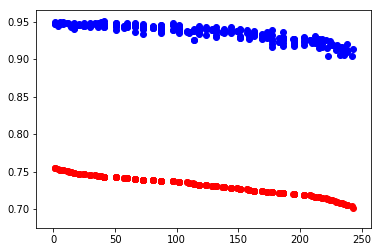

In [17]:
plt.scatter(result_Ada_ran['rank_test_score'],result_Ada_ran['mean_test_score'],color='red')
plt.scatter(result_Ada_ran['rank_test_score'],result_Ada_ran['mean_train_score'],color='blue')

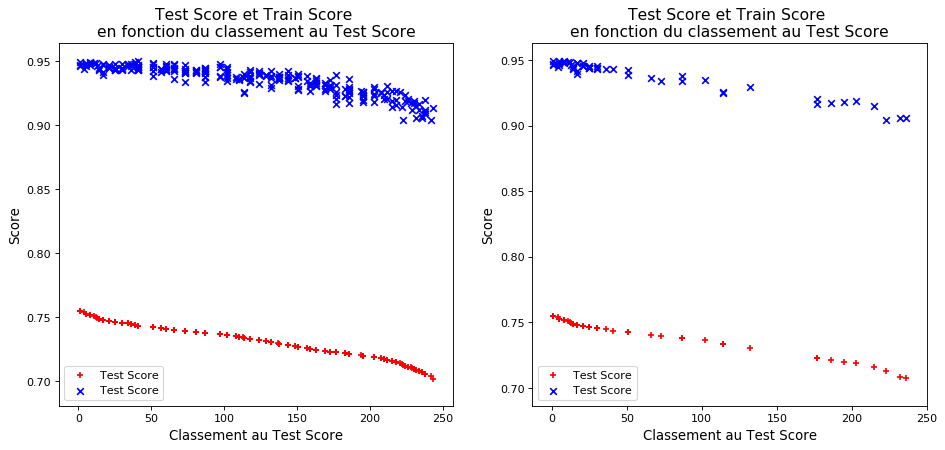

In [26]:
graph_result("result_Ada_ran.csv", variance= 0.2)

In [29]:
result_Ada_ran['param_base_estimator'][result_Ada_ran['rank_test_score'] < 10]

54     RandomForestClassifier(bootstrap=True, class_w...
55     RandomForestClassifier(bootstrap=True, class_w...
81     RandomForestClassifier(bootstrap=True, class_w...
99     RandomForestClassifier(bootstrap=True, class_w...
144    RandomForestClassifier(bootstrap=True, class_w...
153    RandomForestClassifier(bootstrap=True, class_w...
171    RandomForestClassifier(bootstrap=True, class_w...
189    RandomForestClassifier(bootstrap=True, class_w...
198    RandomForestClassifier(bootstrap=True, class_w...
216    RandomForestClassifier(bootstrap=True, class_w...
Name: param_base_estimator, dtype: object

In [43]:
print(result_Ada_ran['param_base_estimator'][216])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [10]:
model1 = RandomForestClassifier()
hyperparameters1 = {'n_estimators': [100,150,200],
                   "criterion": ["entropy"],
                   "max_depth": [2, 5, 10],
                   "max_features": ["auto", "log2", None],
                  }
clf_RFC = GridSearchCV(model1, param_grid = hyperparameters1, return_train_score=True)

In [46]:
%%time
model = AdaBoostClassifier()
model1 = ExtraTreesClassifier()
hyperparameters1 = {'n_estimators': [150,200],
                   "criterion": ["entropy"],
                   "max_depth": [ 5, 10],
                   "max_features": ["auto", None],
                  }
clf = RandomForestClassifier()
base_est_trees = [clf.set_params(**ele) for ele in ParameterGrid(hyperparameters1)]
hyperparameters = {'base_estimator': base_est_trees,                   
                   'n_estimators': [50,100],
                   'learning_rate' : [0.2],
                   'algorithm' : ['SAMME.R']
                  }
clf_Ada_ex = GridSearchCV(model, param_grid = hyperparameters, return_train_score=True,
                           error_score='raise',n_jobs= -1)
clf_Ada_ex.fit(X_train, y_train)
result_Ada_ex = pd.DataFrame.from_dict(clf_Ada_ex.cv_results_)
#Predict values based on new parameters
y_pred_Ada_ex = clf_Ada_ex.predict(X_test)
result_Ada_ex.to_csv("result_Ada_ex.csv", index = False)

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 26min 30s


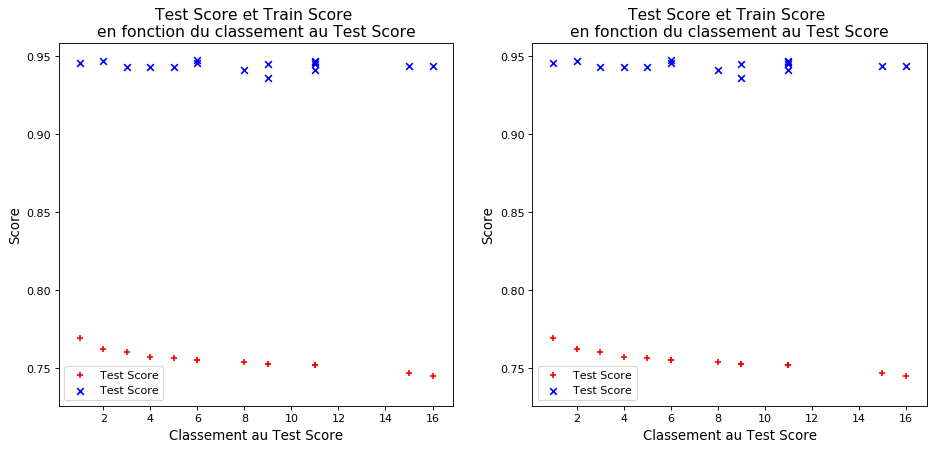

In [47]:
graph_result("result_Ada_ex.csv", variance= 0.2)

In [52]:
result_Ada_ex = pd.read_csv('result_Ada_ex.csv')
result_Ada_ex[result_Ada_ex['rank_test_score'] < 6]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_base_estimator,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,147.412664,1.003096,4.409335,0.091712,SAMME.R,"RandomForestClassifier(bootstrap=True, class_w...",0.2,50,"{'algorithm': 'SAMME.R', 'base_estimator': Ran...",0.776805,0.750000,0.752759,0.759883,0.012051,3,0.946095,0.943956,0.939759,0.943270,0.002632
2,148.093666,0.303968,4.437001,0.053842,SAMME.R,"RandomForestClassifier(bootstrap=True, class_w...",0.2,50,"{'algorithm': 'SAMME.R', 'base_estimator': Ran...",0.783370,0.754386,0.770419,0.769400,0.011869,1,0.940594,0.948352,0.948521,0.945822,0.003698
4,147.661333,4.084565,4.417665,0.074224,SAMME.R,"RandomForestClassifier(bootstrap=True, class_w...",0.2,50,"{'algorithm': 'SAMME.R', 'base_estimator': Ran...",0.772429,0.754386,0.741722,0.756223,0.012599,5,0.941694,0.943956,0.943045,0.942898,0.000929
8,143.175665,1.722865,4.282001,0.034535,SAMME.R,"RandomForestClassifier(bootstrap=True, class_w...",0.2,50,"{'algorithm': 'SAMME.R', 'base_estimator': Ran...",0.770241,0.745614,0.770419,0.762079,0.011656,2,0.947195,0.945055,0.948521,0.946924,0.001428
10,143.548665,1.502156,4.213001,0.102668,SAMME.R,"RandomForestClassifier(bootstrap=True, class_w...",0.2,50,"{'algorithm': 'SAMME.R', 'base_estimator': Ran...",0.768053,0.756579,0.746137,0.756955,0.008948,4,0.942794,0.945055,0.940854,0.942901,0.001717


In [57]:
print(result_Ada_ex['param_base_estimator'][10])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


## AdaBoost: SVM

In [98]:
%%time
model = AdaBoostClassifier()
hyperparameters1 = {'C': [0.6,1,2],'gamma': ['scale'],
                    'kernel': ['rbf','linear'], 'decision_function_shape': ['ovo', 'ovr']}

base_est_svm = [SVC().set_params(**ele) for ele in ParameterGrid(hyperparameters1)]
hyperparameters = {'base_estimator': base_est_svm,                   
                   'n_estimators': [50,75,100],
                   'learning_rate' : [0.2,0.3],
                   'algorithm' : ['SAMME']
                  }
clf_Ada_svm = GridSearchCV(model, param_grid = hyperparameters, return_train_score=True,
                           error_score='raise',n_jobs= -1)
clf_Ada_svm.fit(X_train, y_train)
result_Ada_svm = pd.DataFrame.from_dict(clf_Ada_svm.cv_results_)
#Predict values based on new parameters
y_pred_Ada_svm = clf_Ada_svm.predict(X_test)
result_Ada_svm.to_csv("result_Ada_svm.csv", index = False)

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 1h 13min 25s


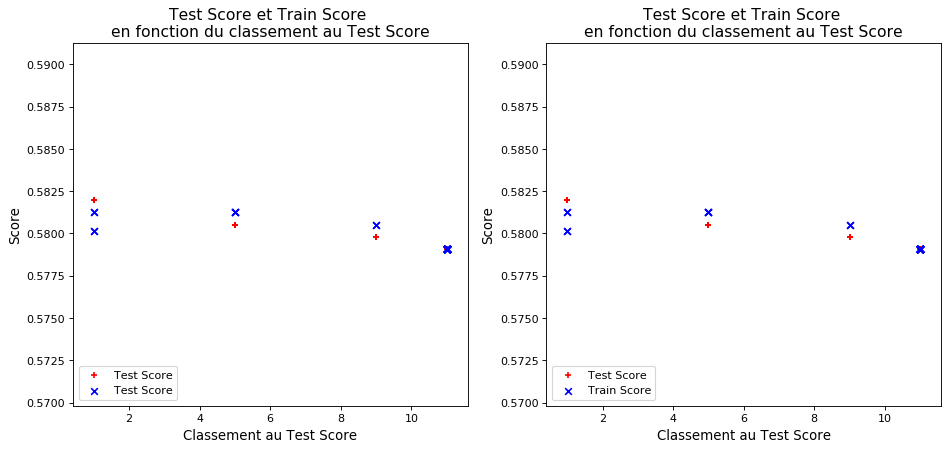

In [108]:
graph_result("result_Ada_svm.csv", variance= 0.2)

In [109]:
result_Ada_svm = pd.read_csv('result_Ada_svm.csv')
result_Ada_svm[result_Ada_svm['rank_test_score'] < 20]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_base_estimator,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,67.263342,0.680612,13.428665,0.102323,SAMME,"SVC(C=0.6, cache_size=200, class_weight=None, ...",0.2,50,"{'algorithm': 'SAMME', 'base_estimator': SVC(C...",0.577681,0.578947,0.580574,0.579063,0.001184,11,0.579758,0.579121,0.578313,0.579064,0.000591
1,104.480672,1.031832,20.478664,0.279485,SAMME,"SVC(C=0.6, cache_size=200, class_weight=None, ...",0.2,75,"{'algorithm': 'SAMME', 'base_estimator': SVC(C...",0.577681,0.578947,0.580574,0.579063,0.001184,11,0.579758,0.579121,0.578313,0.579064,0.000591
2,143.660338,2.263119,27.641004,0.534915,SAMME,"SVC(C=0.6, cache_size=200, class_weight=None, ...",0.2,100,"{'algorithm': 'SAMME', 'base_estimator': SVC(C...",0.577681,0.578947,0.580574,0.579063,0.001184,11,0.579758,0.579121,0.578313,0.579064,0.000591
3,70.895667,2.099106,13.854664,0.269370,SAMME,"SVC(C=0.6, cache_size=200, class_weight=None, ...",0.3,50,"{'algorithm': 'SAMME', 'base_estimator': SVC(C...",0.577681,0.578947,0.580574,0.579063,0.001184,11,0.579758,0.579121,0.578313,0.579064,0.000591
4,108.048334,1.463186,21.785337,2.051923,SAMME,"SVC(C=0.6, cache_size=200, class_weight=None, ...",0.3,75,"{'algorithm': 'SAMME', 'base_estimator': SVC(C...",0.577681,0.578947,0.580574,0.579063,0.001184,11,0.579758,0.579121,0.578313,0.579064,0.000591
5,150.783996,6.163385,26.520005,0.123157,SAMME,"SVC(C=0.6, cache_size=200, class_weight=None, ...",0.3,100,"{'algorithm': 'SAMME', 'base_estimator': SVC(C...",0.577681,0.578947,0.580574,0.579063,0.001184,11,0.579758,0.579121,0.578313,0.579064,0.000591
6,61.676665,4.955540,12.327666,1.529108,SAMME,"SVC(C=0.6, cache_size=200, class_weight=None, ...",0.2,50,"{'algorithm': 'SAMME', 'base_estimator': SVC(C...",0.577681,0.578947,0.580574,0.579063,0.001184,11,0.579758,0.579121,0.578313,0.579064,0.000591
7,92.122337,1.912860,17.287331,0.122015,SAMME,"SVC(C=0.6, cache_size=200, class_weight=None, ...",0.2,75,"{'algorithm': 'SAMME', 'base_estimator': SVC(C...",0.577681,0.578947,0.580574,0.579063,0.001184,11,0.579758,0.579121,0.578313,0.579064,0.000591
8,126.633001,1.169335,22.727668,0.194352,SAMME,"SVC(C=0.6, cache_size=200, class_weight=None, ...",0.2,100,"{'algorithm': 'SAMME', 'base_estimator': SVC(C...",0.577681,0.578947,0.580574,0.579063,0.001184,11,0.579758,0.579121,0.578313,0.579064,0.000591
9,61.999007,0.449718,11.477996,0.116479,SAMME,"SVC(C=0.6, cache_size=200, class_weight=None, ...",0.3,50,"{'algorithm': 'SAMME', 'base_estimator': SVC(C...",0.577681,0.578947,0.580574,0.579063,0.001184,11,0.579758,0.579121,0.578313,0.579064,0.000591


In [112]:
print(result_Ada_svm['param_base_estimator'][29])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [113]:
y_pred_Ada_svm

NameError: name 'y_pred_Ada_svm' is not defined

In [96]:
hyperparameters1 = {'C': [0.6,1,2],'gamma': ['scale'],
                    'kernel': ['rbf','linear'], 'decision_function_shape': ['ovo', 'ovr']}
clf = SVC()
base_est_svm = [SVC().set_params(**ele) for ele in list(ParameterGrid(hyperparameters1))]
base_est_svm


[SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 SVC(C=0.6, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_fu

In [13]:
clf_RFC.Parame

{'n_estimators': [100, 150, 200],
 'criterion': ['entropy'],
 'max_depth': [2, 5, 10],
 'max_features': ['auto', 'log2', None]}

In [14]:
from sklearn.model_selection import ParameterGrid
hyperparameters1 = {'n_estimators': [100,150,200],
                   "criterion": ["entropy"],
                   "max_depth": [2, 5, 10],
                   "max_features": ["auto", "log2", None]
                  }
list(ParameterGrid(hyperparameters1))

[{'criterion': 'entropy',
  'max_depth': 2,
  'max_features': 'auto',
  'n_estimators': 100},
 {'criterion': 'entropy',
  'max_depth': 2,
  'max_features': 'auto',
  'n_estimators': 150},
 {'criterion': 'entropy',
  'max_depth': 2,
  'max_features': 'auto',
  'n_estimators': 200},
 {'criterion': 'entropy',
  'max_depth': 2,
  'max_features': 'log2',
  'n_estimators': 100},
 {'criterion': 'entropy',
  'max_depth': 2,
  'max_features': 'log2',
  'n_estimators': 150},
 {'criterion': 'entropy',
  'max_depth': 2,
  'max_features': 'log2',
  'n_estimators': 200},
 {'criterion': 'entropy',
  'max_depth': 2,
  'max_features': None,
  'n_estimators': 100},
 {'criterion': 'entropy',
  'max_depth': 2,
  'max_features': None,
  'n_estimators': 150},
 {'criterion': 'entropy',
  'max_depth': 2,
  'max_features': None,
  'n_estimators': 200},
 {'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'auto',
  'n_estimators': 100},
 {'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'aut

In [29]:
ParameterGrid(hyperparameters1)[0]

{'n_estimators': 100,
 'max_features': 'auto',
 'max_depth': 2,
 'criterion': 'entropy'}

In [32]:
clf = RandomForestClassifier()
hyperparameter = [{clf.set_params(**ele)} for ele in ParameterGrid(hyperparameters1)]
hyperparameter

[{RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
              max_depth=10, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False)},
 {RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
              max_depth=10, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False)},
 {RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
              max_depth=10, max_feature

In [27]:
bob = [{i} for i in range(10)]
bob

[{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}]

In [24]:
GridSearchCV(model1, param_grid = hyperparameters1, return_train_score=True).param_distri

{'n_estimators': [100, 150, 200],
 'criterion': ['entropy'],
 'max_depth': [2, 5, 10],
 'max_features': ['auto', 'log2', None]}

In [21]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score='warn')
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator 

In [23]:
RandomForestClassifier(list(ParameterGrid(hyperparameters1)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,
            n_estimators=[{'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 100}, {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 150}, {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 200}, {'criterion': 'entropy', ...mators': 150}, {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'n_estimators': 200}],
            n_jobs=None, oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
centre = [1 if (df['localisation'][i] in df['adresse'][i]) else 0 for i in range(len(df))]
len(centre)
df['centre'] = centre
df['centre']

In [7]:
%%time
model = AdaBoostClassifier()
hyperparameters = {'base_estimator':[RandomForestClassifier(criterion = 'entropy',
                                          max_depth = 5,
                                          max_features = 'auto',
                                          n_estimators = 100)],
                    'n_estimators': [100,150],
                    'learning_rate' : [0.5,0.3]                         
                  }
clf_Ada_test = GridSearchCV(model, param_grid = hyperparameters, return_train_score=True,
                            error_score='raise',n_jobs=-1)
clf_Ada_test.fit(X_train, y_train)
result_Ada_test = pd.DataFrame.from_dict(clf_Ada_test.cv_results_)
#Predict values based on new parameters
y_pred_Ada_test = clf_Ada_test.predict(X_test)
result_Ada_test.to_csv("result_Ada_test.csv", index = False)

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 2min 25s


In [8]:
result_Ada_test

NameError: name 'result_Ada_test' is not defined

In [9]:
bob = pd.read_csv('result_Ada_test.csv')

In [10]:
bob

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,44.155002,0.192834,4.164334,0.007134,"RandomForestClassifier(bootstrap=True, class_w...",0.5,100,{'base_estimator': RandomForestClassifier(boot...,0.741794,0.723077,0.744493,0.736457,0.009520,4,0.898790,0.906696,0.895833,0.900440,0.004586
1,64.694336,0.159662,5.662000,0.112020,"RandomForestClassifier(bootstrap=True, class_w...",0.5,150,{'base_estimator': RandomForestClassifier(boot...,0.735230,0.731868,0.748899,0.738653,0.007358,2,0.893289,0.901207,0.904605,0.899701,0.004741
2,40.804668,4.065812,3.700007,0.685896,"RandomForestClassifier(bootstrap=True, class_w...",0.3,100,{'base_estimator': RandomForestClassifier(boot...,0.748359,0.749451,0.762115,0.753294,0.006239,1,0.896590,0.909989,0.895833,0.900804,0.006502
3,47.989998,0.235050,3.471338,0.032189,"RandomForestClassifier(bootstrap=True, class_w...",0.3,150,{'base_estimator': RandomForestClassifier(boot...,0.737418,0.734066,0.744493,0.738653,0.004342,2,0.898790,0.906696,0.900219,0.901902,0.003440


In [ ]:
result_